In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print(os.getcwd())

/home/kkkzoz/Projects/oreo/benchmarks/cmd/scripts


In [12]:
# Replace this path with your actual CSV file path
file_path = '../iot/iot_benchmark_results.csv'

# Load the CSV data
data = pd.read_csv(file_path)
data.head()  # Display the first few rows for verification


,thread,operation,native,cg,oreo,native_p99,cg_p99,oreo_p99
0,32,10000,10.150333,33.366798,7.309396,33983,112127,28095
1,64,10000,5.125482,16.776891,3.984070,36031,114303,40831
2,96,10000,3.499169,11.212254,3.477639,36799,116863,50463


In [13]:
# Calculate Throughput for native, cg, and oreo
data['native_throughput'] = data['operation'] / data['native']
data['cg_throughput'] = data['operation'] / data['cg']
data['oreo_throughput'] = data['operation'] / data['oreo']
data.head()  # Display the data to verify the new throughput columns


,thread,operation,native,cg,oreo,native_p99,cg_p99,oreo_p99,native_throughput,cg_throughput,oreo_throughput
0,32,10000,10.150333,33.366798,7.309396,33983,112127,28095,985.189373,299.699121,1368.102053
1,64,10000,5.125482,16.776891,3.984070,36031,114303,40831,1951.035963,596.057983,2509.996078
2,96,10000,3.499169,11.212254,3.477639,36799,116863,50463,2857.821475,891.881357,2875.514114


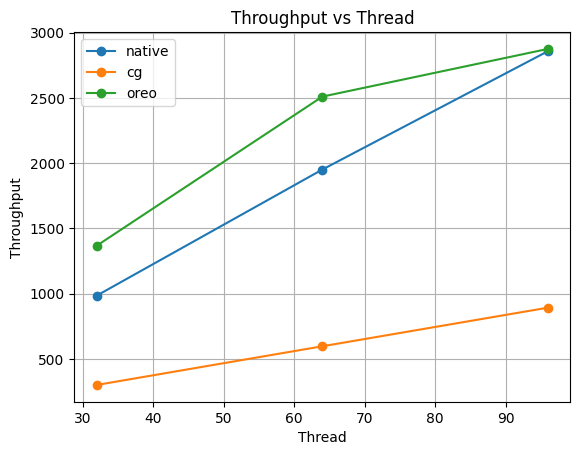

In [14]:
# Plot Throughput
plt.figure()
plt.plot(data['thread'], data['native_throughput'], label='native', marker='o')
plt.plot(data['thread'], data['cg_throughput'], label='cg', marker='o')
plt.plot(data['thread'], data['oreo_throughput'], label='oreo', marker='o')
plt.xlabel('Thread')
plt.ylabel('Throughput')
plt.title('Throughput vs Thread')
plt.legend()
plt.grid(True)
plt.show()


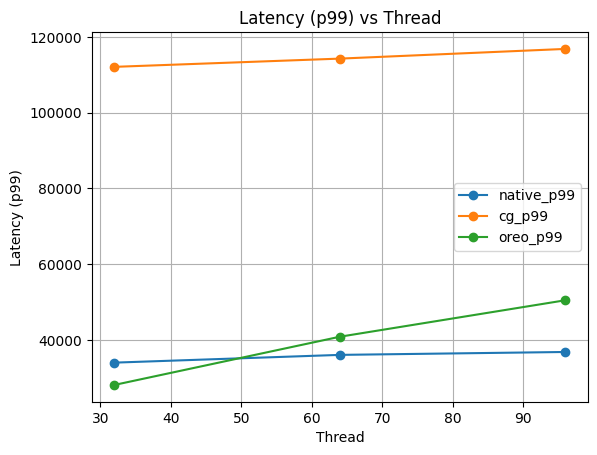

In [15]:
# Plot Latency
plt.figure()
plt.plot(data['thread'], data['native_p99'], label='native_p99', marker='o')
plt.plot(data['thread'], data['cg_p99'], label='cg_p99', marker='o')
plt.plot(data['thread'], data['oreo_p99'], label='oreo_p99', marker='o')
plt.xlabel('Thread')
plt.ylabel('Latency (p99)')
plt.title('Latency (p99) vs Thread')
plt.legend()
plt.grid(True)
plt.show()
